In [2]:
import pandas
import pytz
from pytz import utc
from datetime import datetime
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


###  Average rating per day

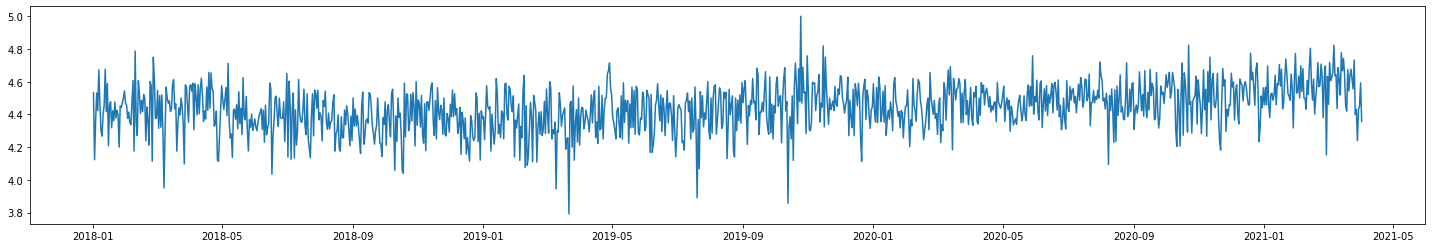

In [3]:
data['Day']=data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
plt.figure(figsize=(25,4))
plt.plot(day_average.index,day_average['Rating'])

In [4]:
min(day_average['Rating'])

3.7916666666666665

###  Average rating per week

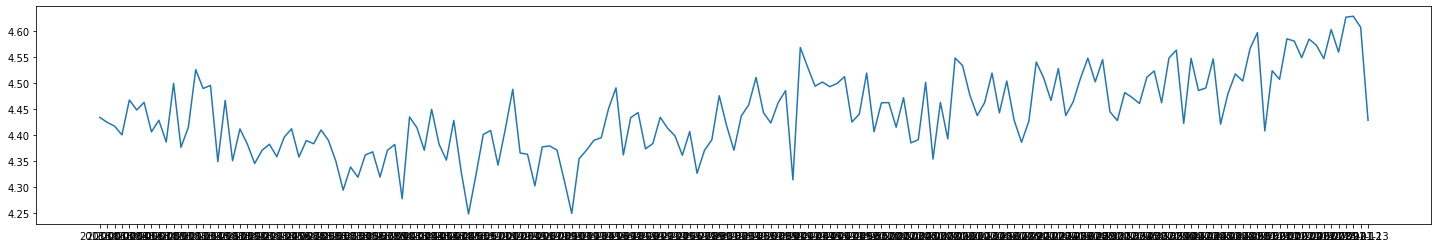

In [5]:
data['Week']=data['Timestamp'].dt.strftime('%Y-%U')
data['Week']
week_average = data.groupby(['Week']).mean()
plt.figure(figsize=(25,4))
plt.plot(week_average.index,week_average['Rating'])

### Average rating per month

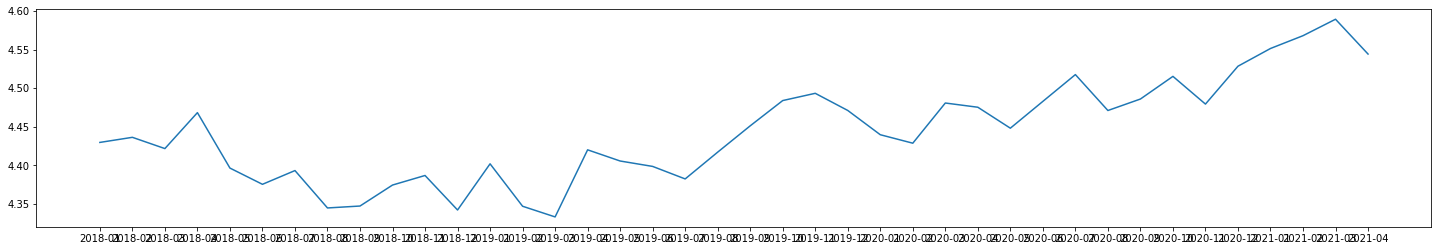

In [6]:
data['Month']=data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
plt.figure(figsize=(25,4))
plt.plot(month_average.index,month_average['Rating'])

### Average rating per month for each course

In [7]:
data['Month']=data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month','Course Name'])['Rating'].count().unstack()
month_average_crs[-20:]

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2019-09,32.0,19.0,24.0,8.0,20.0,74.0,NaN,836.0
2019-10,40.0,5.0,25.0,10.0,8.0,62.0,NaN,718.0
2019-11,41.0,7.0,18.0,17.0,16.0,62.0,NaN,655.0
2019-12,36.0,8.0,24.0,24.0,17.0,60.0,NaN,988.0
2020-01,45.0,11.0,29.0,22.0,27.0,59.0,NaN,1314.0
2020-02,35.0,9.0,32.0,10.0,15.0,51.0,NaN,857.0
2020-03,50.0,8.0,34.0,20.0,23.0,67.0,NaN,1248.0
2020-04,82.0,13.0,51.0,30.0,32.0,98.0,NaN,1853.0
2020-05,88.0,22.0,59.0,28.0,29.0,60.0,NaN,1852.0


<AxesSubplot:xlabel='Month'>

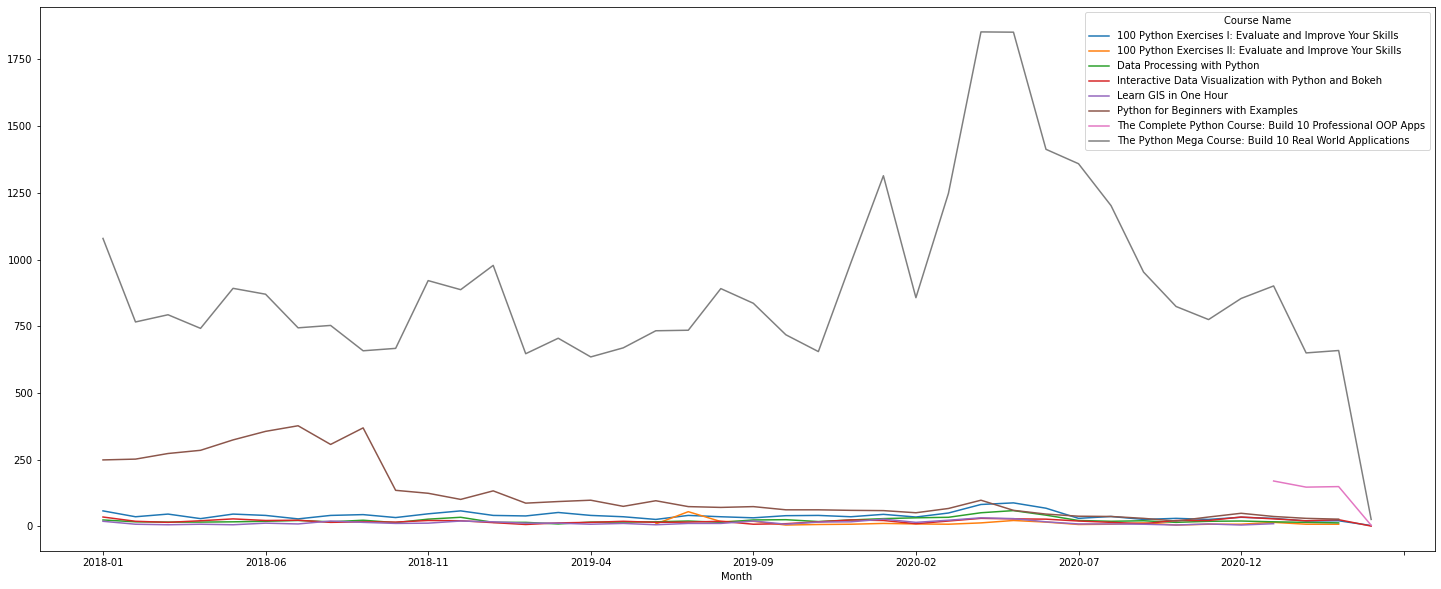

In [8]:
month_average_crs.plot(figsize=(25,10))

### On what day of the week people are the happiest

<AxesSubplot:xlabel='Day Number,Week Day'>

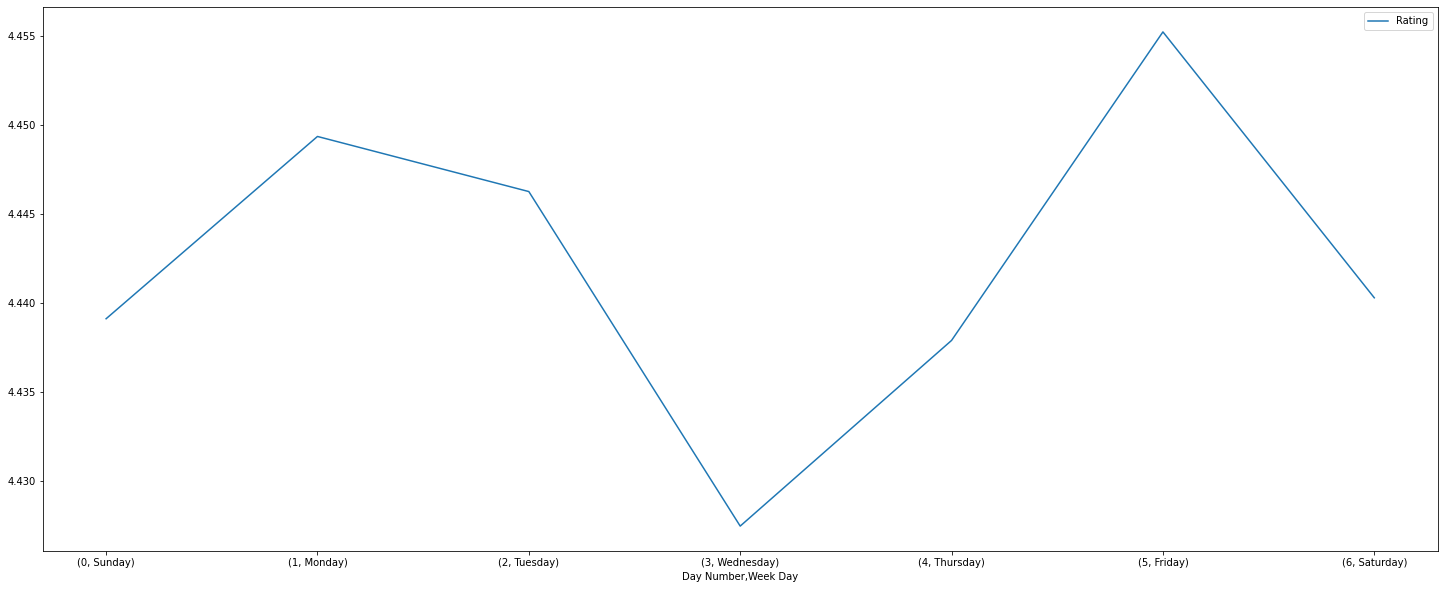

In [9]:
data['Week Day']=data['Timestamp'].dt.strftime('%A')
data['Day Number']=data['Timestamp'].dt.strftime("%w")
new_df = data.groupby(['Day Number', 'Week Day']).mean()
new_df.plot(figsize=(25,10))